In [43]:
#Utilities
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
import cv2
import numpy as np


In [44]:
#Class Mapping
classes_mapper = {
    0: "crop",
    1: "weed"
}
#For Loading the Data set
class Data:
    IMG_SIZE = 512
    DATA_PATH = "../Question2/Dataset/data"
    COLS = [
        "image_id",
        "path",
        "bbox",
        "label",
        "width",
        "height"
    ]

In [45]:
#Processing the Data
images_list = list(filter(lambda x: x.split(".")[1] == "jpeg", os.listdir(Data.DATA_PATH)))
texts_list = list(filter(lambda x: x.split(".")[1] == "txt", os.listdir(Data.DATA_PATH)))
counter = [0, 0, 0]
for txt_file in texts_list:
    coords = list(map(lambda x: x.replace("\n", ""), open(f"{Data.DATA_PATH}/{txt_file}", "r").readlines()))
    for coord in coords:
        label, _, _, _, _ = coord.split()
        counter[int(label)] += 1

for i in range(2):
    print(f"{classes_mapper[i]} : {counter[i]}")

df = pd.DataFrame(columns = Data.COLS)
for txt_file in texts_list:
    img_file = f"{txt_file.split('.')[0]}.jpeg"
    bboxes = list(map(lambda x: x.replace("\n", ""), open(f"{Data.DATA_PATH}/{txt_file}").readlines()))
    for bbox in bboxes:
        label, x_center, y_center, W, H = bbox.split()
        label = int(label)
        x_center, y_center, W, H = list(map(lambda x: float(x), [x_center, y_center, W, H]))
        x1 = int(512*(x_center - W/2))
        x2 = int(512*(x_center + W/2))
        y1 = int(512*(y_center - H/2))
        y2 = int(512*(y_center + H/2))
        image_id = img_file.split(".")[0]
        path = f"{Data.DATA_PATH}/{img_file}"
        bbox = [x1, y1, x2, y2]
        label = classes_mapper[label]
        width = height = Data.IMG_SIZE
         # Appending row to the df
        row = [image_id, path, bbox, label, width, height]
        df.loc[len(df)] = row
#Saving the Processed Data        
df.to_csv('data.csv')

crop : 1212
weed : 860


In [46]:
df.head()

image_id                                        path  \
0  agri_0_1009  ../Question2/Dataset/data/agri_0_1009.jpeg   
1  agri_0_1017  ../Question2/Dataset/data/agri_0_1017.jpeg   
2  agri_0_1018  ../Question2/Dataset/data/agri_0_1018.jpeg   
3  agri_0_1020  ../Question2/Dataset/data/agri_0_1020.jpeg   
4  agri_0_1024  ../Question2/Dataset/data/agri_0_1024.jpeg   

                   bbox label  width  height  
0  [172, 119, 449, 391]  weed    512     512  
1      [8, 4, 500, 390]  weed    512     512  
2    [20, 84, 434, 409]  weed    512     512  
3    [66, 23, 440, 336]  weed    512     512  
4   [161, 76, 453, 381]  weed    512     512

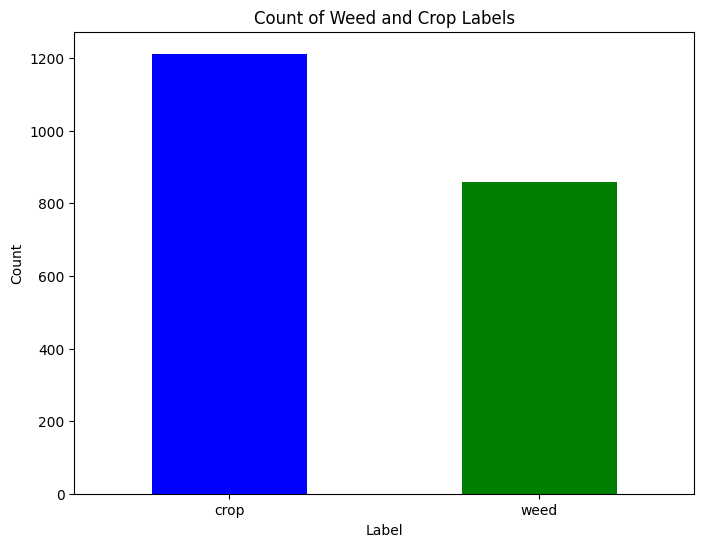

In [47]:
import matplotlib.pyplot as plt
#Graph for Weed and Crop Count
label_counts = df['label'].value_counts()
# Plotting the bar graph
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Count of Weed and Crop Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [48]:
# Function to load image and extract region specified by bounding box
def load_image_and_extract_region(path, bbox):
    image = cv2.imread(path)
    x1, y1, x2, y2 = bbox
    print(x1,y1,x2,y2)
    print("Input Image Dimensions:", image.shape)
    region = image[y1:y2, x1:x2]
    print("Extracted Region Dimensions:", region.shape)
    region = cv2.resize(region, (244,244))
    return region


In [49]:
#Data processing Load images and extract regions specified by bounding boxes
import ast
X = []
for index, row in df.iterrows():
    image_path = row['path']
    bbox = row['bbox']
    width = row['width']
    height = row['height']
    region = load_image_and_extract_region(image_path, bbox)
    X.append(region)
X = np.array(X)
# Normalize pixel values to range [0, 1]
X = X / 255.0

172 119 449 391
Input Image Dimensions: (512, 512, 3)
Extracted Region Dimensions: (272, 277, 3)
8 4 500 390
Input Image Dimensions: (512, 512, 3)
Extracted Region Dimensions: (386, 492, 3)
20 84 434 409
Input Image Dimensions: (512, 512, 3)
Extracted Region Dimensions: (325, 414, 3)
66 23 440 336
Input Image Dimensions: (512, 512, 3)
Extracted Region Dimensions: (313, 374, 3)
161 76 453 381
Input Image Dimensions: (512, 512, 3)
Extracted Region Dimensions: (305, 292, 3)
125 84 383 337
Input Image Dimensions: (512, 512, 3)
Extracted Region Dimensions: (253, 258, 3)
225 129 261 161
Input Image Dimensions: (512, 512, 3)
Extracted Region Dimensions: (32, 36, 3)
232 66 260 108
Input Image Dimensions: (512, 512, 3)
Extracted Region Dimensions: (42, 28, 3)
58 97 94 144
Input Image Dimensions: (512, 512, 3)
Extracted Region Dimensions: (47, 36, 3)
198 240 231 261
Input Image Dimensions: (512, 512, 3)
Extracted Region Dimensions: (21, 33, 3)
381 192 404 225
Input Image Dimensions: (512, 512, 3

In [50]:
#Encoding the Label
df["label"] = df["label"].replace("crop",0)
df["label"] = df["label"].replace("weed",1)
df.head()

C:\Users\Tayyab Anees\AppData\Local\Temp\ipykernel_42064\642737720.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"] = df["label"].replace("weed",1)


image_id                                        path  \
0  agri_0_1009  ../Question2/Dataset/data/agri_0_1009.jpeg   
1  agri_0_1017  ../Question2/Dataset/data/agri_0_1017.jpeg   
2  agri_0_1018  ../Question2/Dataset/data/agri_0_1018.jpeg   
3  agri_0_1020  ../Question2/Dataset/data/agri_0_1020.jpeg   
4  agri_0_1024  ../Question2/Dataset/data/agri_0_1024.jpeg   

                   bbox  label  width  height  
0  [172, 119, 449, 391]      1    512     512  
1      [8, 4, 500, 390]      1    512     512  
2    [20, 84, 434, 409]      1    512     512  
3    [66, 23, 440, 336]      1    512     512  
4   [161, 76, 453, 381]      1    512     512

In [52]:
# Split the data into training and testing sets (80% training, 20% testing)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

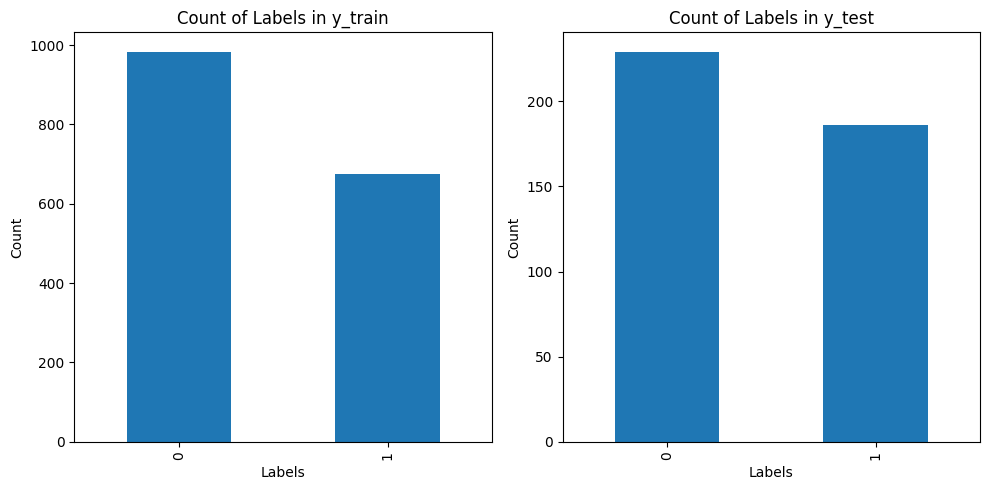

In [53]:
# Count the labels in y_train and y_test
train_label_counts = pd.Series(y_train).value_counts()
test_label_counts = pd.Series(y_test).value_counts()

# Plot the graph of y_train
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
train_label_counts.plot(kind='bar')
plt.title('Count of Labels in y_train')
plt.xlabel('Labels')
plt.ylabel('Count')

# Plot the graph of y_test
plt.subplot(1, 2, 2)
test_label_counts.plot(kind='bar')
plt.title('Count of Labels in y_test')
plt.xlabel('Labels')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [54]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [55]:
# Compile the model with appropriate optimizer, loss, and metrics
model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Train the model
history=model.fit(X_train, y_train, epochs=20, batch_size=30, validation_split=0.1)

Epoch 1/20
50/50 [==============================] - 78s 2s/step - loss: 0.7104 - accuracy: 0.6237 - val_loss: 0.5391 - val_accuracy: 0.7590
Epoch 2/20
50/50 [==============================] - 78s 2s/step - loss: 0.4147 - accuracy: 0.8182 - val_loss: 0.3752 - val_accuracy: 0.8554
Epoch 3/20
50/50 [==============================] - 86s 2s/step - loss: 0.4022 - accuracy: 0.8317 - val_loss: 0.3354 - val_accuracy: 0.8855
Epoch 4/20
50/50 [==============================] - 93s 2s/step - loss: 0.3795 - accuracy: 0.8377 - val_loss: 0.4442 - val_accuracy: 0.8554
Epoch 5/20
50/50 [==============================] - 102s 2s/step - loss: 0.3267 - accuracy: 0.8726 - val_loss: 0.2997 - val_accuracy: 0.8795
Epoch 6/20
50/50 [==============================] - 114s 2s/step - loss: 0.2803 - accuracy: 0.8867 - val_loss: 0.4217 - val_accuracy: 0.8434
Epoch 7/20
50/50 [==============================] - 136s 3s/step - loss: 0.2978 - accuracy: 0.8900 - val_loss: 0.3341 - val_accuracy: 0.8554
Epoch 8/20
50/50 

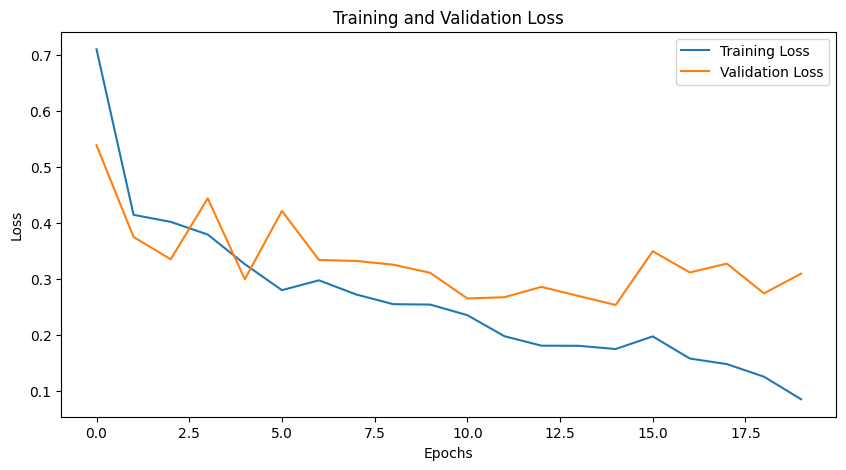

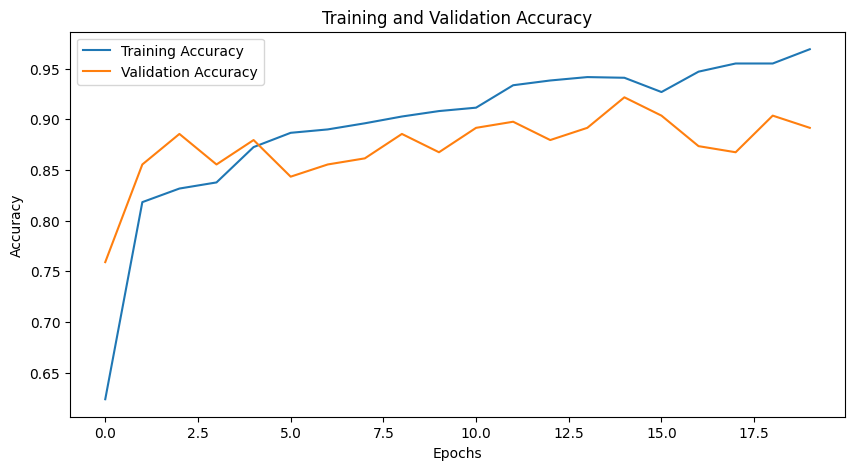

In [57]:
#Plotting Graphs for Accuracy
# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
#Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

13/13 [==============================] - 4s 278ms/step - loss: 0.2206 - accuracy: 0.9446
Test Accuracy: 0.9445782899856567


In [58]:
# Save the model
model.save("Weed_Detection_Model.keras")

In [66]:
#Some manual Testing
def preprocess_image(path,x1,y1,x2,y2,label2):
    classes = {
    0: "crop",
    1: "weed"
      }
    image = cv2.imread(path)
    region = image[y1:y2, x1:x2]
    processed_image = cv2.resize(region, (244, 244))
    processed_image = processed_image / 255.0
    prediction = model.predict(np.expand_dims(processed_image, axis=0))
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = classes[predicted_class_index]
    confidence_score = prediction[0][predicted_class_index]
    print(path)
    print("Actual Class: "+classes[label2])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    text = f"{predicted_class_name}: {confidence_score:.2f}"
    cv2.putText(image, text, (225, 129 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 149ms/step
../Question2/Dataset/data/agri_0_5632.jpeg
Actual Class: weed


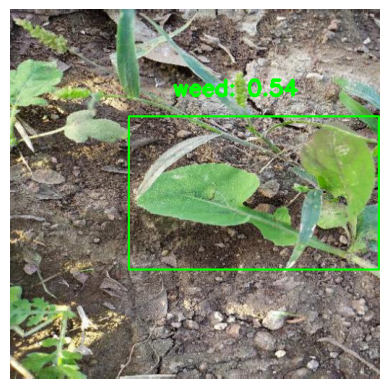

1/1 [==============================] - 0s 39ms/step
../Question2/Dataset/data/agri_0_584.jpeg
Actual Class: weed


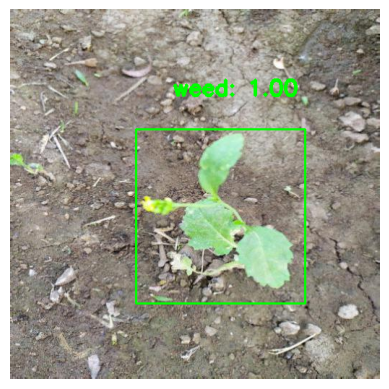

1/1 [==============================] - 0s 40ms/step
../Question2/Dataset/data/agri_0_9960.jpeg
Actual Class: weed


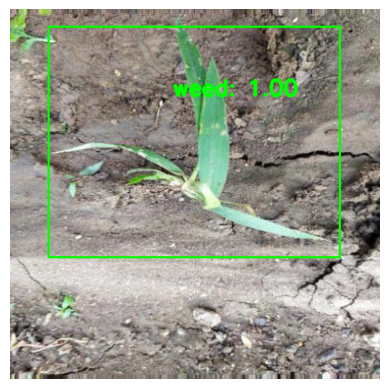

1/1 [==============================] - 0s 38ms/step
../Question2/Dataset/data/agri_0_6216.jpeg
Actual Class: weed


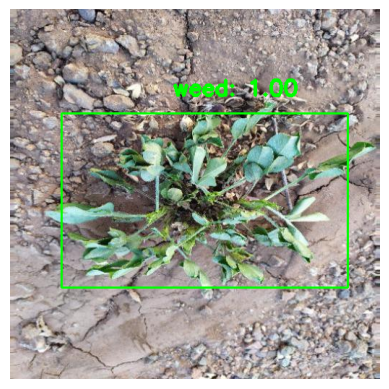

1/1 [==============================] - 0s 39ms/step
../Question2/Dataset/data/agri_0_1806.jpeg
Actual Class: weed


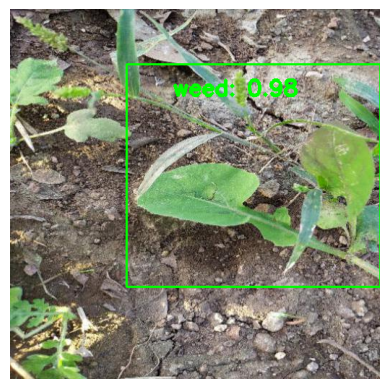

1/1 [==============================] - 0s 41ms/step
../Question2/Dataset/data/agri_0_3077.jpeg
Actual Class: weed


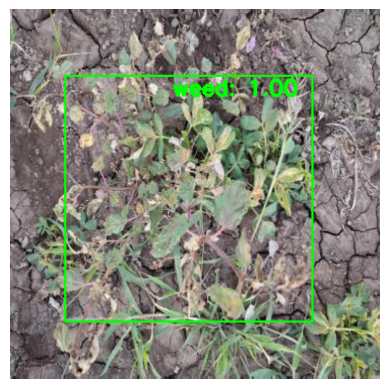

1/1 [==============================] - 0s 38ms/step
../Question2/Dataset/data/agri_0_9183.jpeg
Actual Class: weed


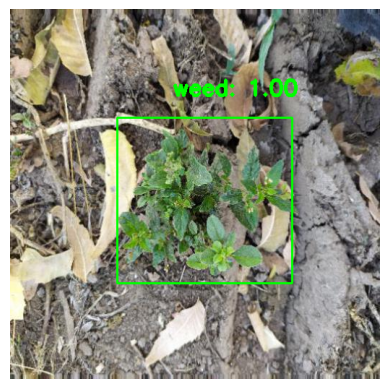

1/1 [==============================] - 0s 39ms/step
../Question2/Dataset/data/agri_0_3989.jpeg
Actual Class: weed


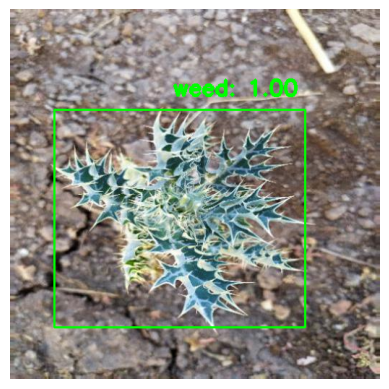

1/1 [==============================] - 0s 40ms/step
../Question2/Dataset/data/agri_0_3990.jpeg
Actual Class: weed


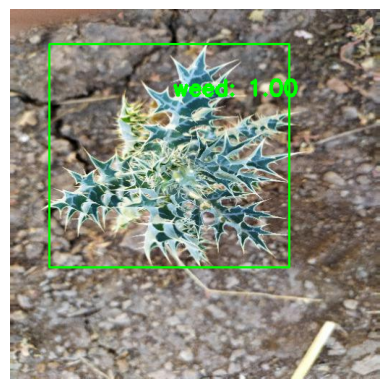

1/1 [==============================] - 0s 37ms/step
../Question2/Dataset/data/agri_0_4388.jpeg
Actual Class: weed


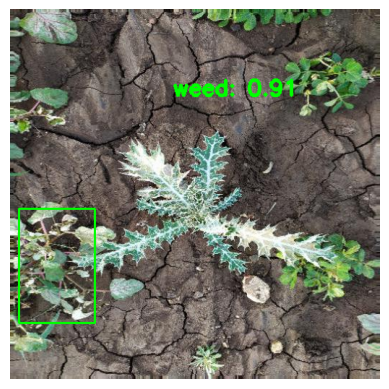

In [67]:
filtered_df = df[df['label'] == 1]
for _ in range(10):
    random_row = filtered_df.sample()
    path = random_row['path'].values[0]
    x1, y1, x2, y2 = random_row['bbox'].values[0]
    label_value = random_row['label'].values[0]
    preprocess_image(path, x1, y1, x2, y2, label_value)
